In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
data = gpd.read_file("E:/Thesis/Data/cropped/rwanda_districts.gpkg")
data.head()

ID_0  ISO  NAME_0  ID_1        NAME_1  ID_2   NAME_2    TYPE_2 ENGTYPE_2  \
0   189  RWA  Rwanda     1  Amajyaruguru     1   Burera  District  District   
1   189  RWA  Rwanda     1  Amajyaruguru     2  Gakenke  District  District   
2   189  RWA  Rwanda     1  Amajyaruguru     3  Gicumbi  District  District   
3   189  RWA  Rwanda     1  Amajyaruguru     4  Musanze  District  District   
4   189  RWA  Rwanda     1  Amajyaruguru     5  Rulindo  District  District   

  NL_NAME_2 VARNAME_2    ntl_total  road_total  pixel_total  ntl_ratio  \
0      None      None   561.850001       286.0       3017.0   0.186228   
1      None      None   695.800001       280.0       3288.0   0.211618   
2      None      None  1100.600001       327.0       3876.0   0.283953   
3      None      None   944.200002       297.0       2479.0   0.380879   
4      None      None   780.500000       320.0       2656.0   0.293863   

   road_ratio                                           geometry  
0    0.094796  POLYGON ((29.82406 -1.30875, 29.82414 -1.30877...  
1    0.085158  POLYGON ((29.77391 -1.55936, 29.77411 -1.55974...  
2    0.084365  POLYGON ((30.07308 -1.39172, 30.07328 -1.39179...  
3    0.119806  POLYGON ((29.61437 -1.38640, 29.61596 -1.38658...  
4    0.120482  POLYGON ((29.90165 -1.58997, 29.90172 -1.59004...

In [2]:
data=data.rename(columns={"ntl_total": "ntl", "road_total": "road", "pixel_total": "totalpixel"})

In [3]:
Total_pixel = data['totalpixel'].sum()
Total_light = data['ntl'].sum()
Total_road = data['road'].sum()

In [4]:
mean_light= Total_light/Total_pixel
mean_road= Total_road/Total_pixel
print("Mean light of Rwanda is: "+str(mean_light)+" and Mean road of Rwanda is:  "+str(mean_road))

Mean light of Rwanda is: 0.3730470281332726 and Mean road of Rwanda is:  0.07133569739952719


In [5]:
import numpy as np
light= np.std(data.ntl_ratio)
print("standard deviation of light "+str(light))
road= np.std(data.road_ratio)
print("standard deviation of road "+str(road))

standard deviation of light 1.0404981080139866
standard deviation of road 0.052170494371436026


In [6]:
data['dev_road'] = data.road_ratio-mean_road
data['dev_light'] = data.ntl_ratio-mean_light

In [7]:
data['nor_road']=(data['dev_road']-data['dev_road'].min())/(data['dev_road'].max()-data['dev_road'].min())
data['nor_light']=(data['dev_light']-data['dev_light'].min())/(data['dev_light'].max()-data['dev_light'].min())

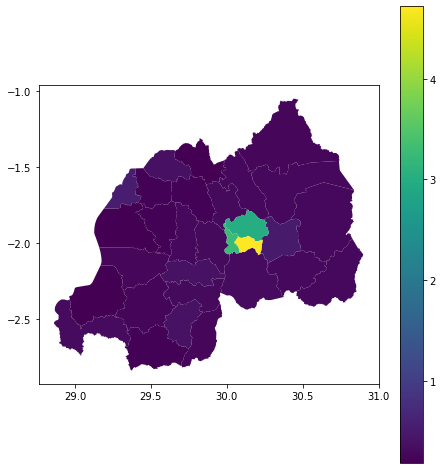

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as plticker
font = {
        'family':'serif',
        'size'   : 7,
        'weight':'bold'}     
fig, ax = plt.subplots(figsize=(7,7))
data.plot(column='ntl_ratio',ax=ax,legend=True)
plt.rcParams.update({'font.size': 22})
#ax.tick_params(labeltop=True, labelright=True)
fig.tight_layout()



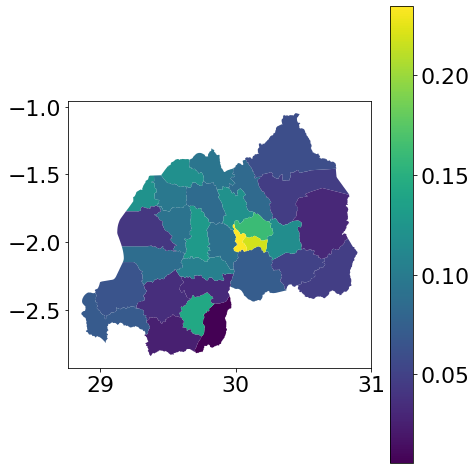

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as plticker
font = {
        'family':'serif',
        'size'   : 7,
        'weight':'bold'}     
fig, ax = plt.subplots(figsize=(7,7))
data.plot(column='road_ratio',ax=ax,legend=True)
plt.rcParams.update({'font.size': 22})
#ax.tick_params(labeltop=True, labelright=True)
fig.tight_layout()



In [10]:
data1=data.sort_values(by=['dev_light'])

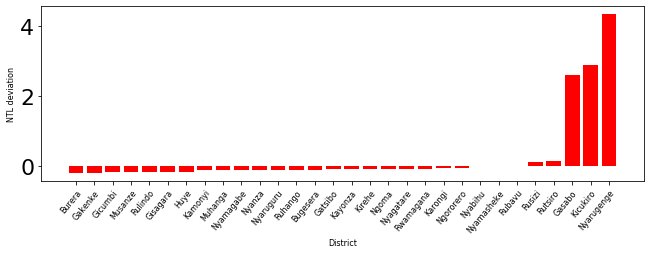

In [11]:
plt.rcParams['figure.figsize'] = (9.5,4)

fig, ax = plt.subplots()
font = {
        'family':'serif',
        'size'   : 8.5,
        'weight':'bold'}

ax.bar(
    x=data1.NAME_2,
    height=data1.dev_light,
    color='r',
)


ax.set_xticklabels(data.NAME_2,rotation=90,fontsize=8)


ax.set_xlabel("District",fontsize=8)
ax.set_ylabel("NTL deviation",fontsize=8)



plt.setp(ax.get_xticklabels(), rotation=50, ha="right",
         rotation_mode="anchor")

fig.tight_layout()



In [12]:
data1=data.sort_values(by=['dev_road'])


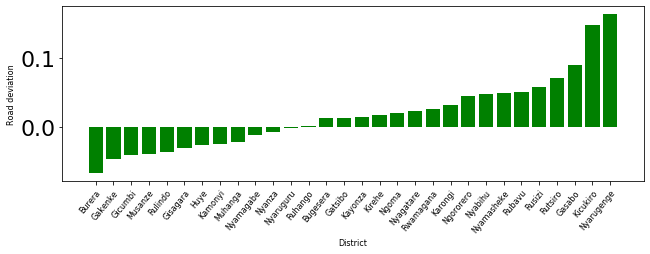

In [13]:
plt.rcParams['figure.figsize'] = (9.5,4)

fig, ax = plt.subplots()
font = {
        'family':'serif',
        'size'   : 8.5,
        'weight':'bold'}

ax.bar(
    x=data1.NAME_2,
    height=data1.dev_road,
    color='g',
)


ax.set_xticklabels(data.NAME_2,rotation=90,fontsize=8)


ax.set_xlabel("District",fontsize=8)
ax.set_ylabel("Road deviation",fontsize=8)



plt.setp(ax.get_xticklabels(), rotation=50, ha="right",
         rotation_mode="anchor")

fig.tight_layout()



In [14]:
data['dev']=data['nor_light']-data['nor_road']
data=data.sort_values(by=['dev'])

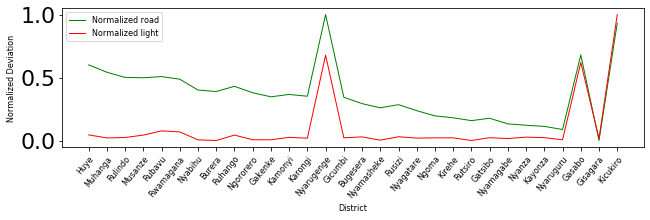

In [15]:
plt.rcParams['figure.figsize'] = (9.5,3.5)

fig, ax = plt.subplots()
font = {
        'family':'serif',
        'size'   : 8.5,
        'weight':'bold'}
'''
ax.bar(
    x=data1.ADM2_EN,
    height=data1.dev_light,
    color='r',
)
'''
ax.plot(data.NAME_2,data.nor_road,'g',linewidth=1)
ax.plot(data.NAME_2,data.nor_light,'r',linewidth=1)
ax.set_xticklabels(data.NAME_2,rotation=90,fontsize=8)

ax.set_xlabel("District",fontsize=8)

ax.set_ylabel("Normalized Deviation",fontsize=8)

plt.legend(['Normalized road','Normalized light'], loc='upper left',prop={'size': 8})

plt.setp(ax.get_xticklabels(), rotation=50, ha="right",
         rotation_mode="anchor")
fig.tight_layout()

